<div style="border-radius: 30px 0 30px 0px;width:95%; border: 2px solid #00ea98; padding: 20px; background-color: #000000; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);">
    <h1 style="color: #87CEEB; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px; font-size: 36px;">Import Required Libraries</h1>
</div>

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

<div style="border-radius: 30px 0 30px 0px;width:95%; border: 2px solid #00ea98; padding: 20px; background-color: #000000; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);">
    <h1 style="color: #87CEEB; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px; font-size: 36px;">Load Dataset</h1>
</div>

In [35]:
test=pd.read_csv('test.csv')
train=pd.read_csv('train.csv')
print("train_shape: ",train.shape)
print("test_shape: ",test.shape)

train_shape:  (1460, 81)
test_shape:  (1459, 80)


<div style="border-radius: 30px 0 30px 0px;width:95%; border: 2px solid #00ea98; padding: 20px; background-color: #000000; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);">
    <h1 style="color: #87CEEB; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px; font-size: 36px;">EDA</h1>
</div>

In [36]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [37]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [38]:
missing=train.isnull().sum()

In [39]:
missing=missing[missing>0].sort_values(ascending=False)
missing.head(10)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
dtype: int64

<div style="border-radius: 30px 0 30px 0px;width:95%; border: 2px solid #00ea98; padding: 20px; background-color: #000000; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);">
    <h1 style="color: #87CEEB; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px; font-size: 36px;">Statistical Anaylsis</h1>
</div>

In [40]:
train.describe(include="all")

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,...,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,...,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,...,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,...,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,...,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,...,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,365.750000,20.000000,NaN,59.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,129975.000000
50%,730.500000,50.000000,NaN,69.000000,9478.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,163000.000000
75%,1095.250000,70.000000,NaN,80.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000


<div style="border-radius: 30px 0 30px 0px;width:95%; border: 2px solid #00ea98; padding: 20px; background-color: #000000; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);">
    <h1 style="color: #87CEEB; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px; font-size: 36px;">Impute Missing Values</h1>
</div>

In [41]:
train.isnull().sum().sort_values(ascending=False).head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
Id                 0
dtype: int64

In [42]:
# handling categorical features
cat_features=train.select_dtypes(include=['object']).columns
for col in cat_features:
    train[col].fillna(train[col].mode()[0],inplace=True)
    test[col].fillna(test[col].mode()[0],inplace=True)

In [47]:
column=["LotFrontage","GarageYrBlt","MasVnrArea"]
for col in column:
    train[col].fillna(train[col].mean(),inplace=True)
    test[col].fillna(test[col].mean(),inplace=True)

In [50]:
train[["LotFrontage","GarageYrBlt","MasVnrArea"]].dtypes

LotFrontage    float64
GarageYrBlt    float64
MasVnrArea     float64
dtype: object

In [49]:
train.isna().sum().sort_values(ascending=False)

GarageYrBlt     1460
LotFrontage     1460
MasVnrArea      1460
Id                 0
KitchenAbvGr       0
                ... 
ExterQual          0
MasVnrType         0
Exterior2nd        0
Exterior1st        0
SalePrice          0
Length: 81, dtype: int64

<div style="border-radius: 30px 0 30px 0px;width:95%; border: 2px solid #00ea98; padding: 20px; background-color: #000000; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);">
    <h1 style="color: #87CEEB; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px; font-size: 36px;">Visualization</h1>
</div>

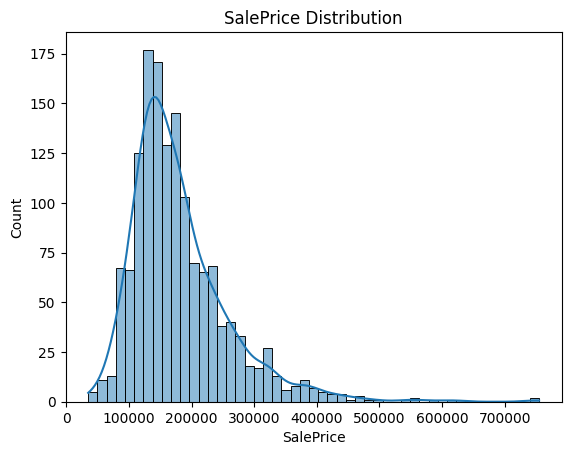

In [133]:
sns.histplot(train['SalePrice'], kde=True)
plt.title("SalePrice Distribution")
plt.show()

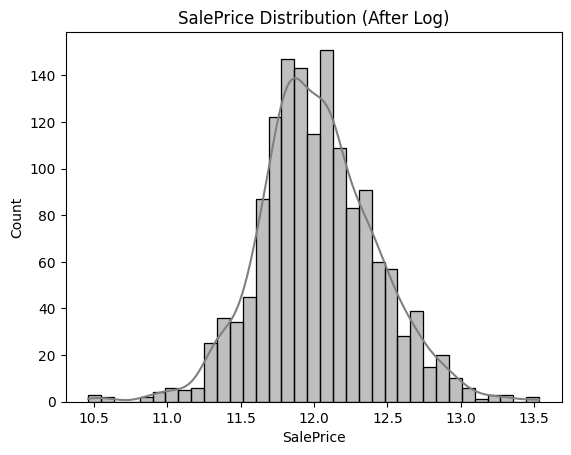

In [134]:
#log transformation
train["SalePrice"] = np.log(train["SalePrice"])

sns.histplot(train['SalePrice'], kde=True, color="gray")
plt.title("SalePrice Distribution (After Log)")
plt.show()

# `Feature Encoding`

In [ ]:
all_data = pd.concat([train.drop('SalePrice', axis=1), test], axis=0)

obj_cols = all_data.select_dtypes(include='object').columns
le = LabelEncoder()
for col in obj_cols:
    all_data[col] = le.fit_transform(all_data[col])

X = all_data.iloc[:train.shape[0], :]
X_test = all_data.iloc[train.shape[0]:, :]
y = train['SalePrice']

# `Train Test Split`

In [136]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

In [137]:
# select best model
models = {
    "RandomForest": RandomForestRegressor(),
    "XGBoost": XGBRegressor(),
    "LightGBM": LGBMRegressor(),
    "CatBoost": CatBoostRegressor(verbose=0)
}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_valid)
    rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
    print(f"{name} RMSE: {rmse}")

RandomForest RMSE: 0.15025704010989327
XGBoost RMSE: 0.14858255512917037
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001499 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3367
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 73
[LightGBM] [Info] Start training from score 12.030652
LightGBM RMSE: 0.14173131267332428
CatBoost RMSE: 0.13546979162735184


# `Hyperparameter Tunning`

In [ ]:
cat=CatBoostRegressor(verbose=0)
param_grid = {
    'iterations': [100, 200],
    'depth': [4, 6, 8],
    'learning_rate': [0.01, 0.1, 0.2],
    'l2_leaf_reg': [1, 3, 5, 7, 9],
    }
grid_search = GridSearchCV(estimator=cat, 
                           param_grid=param_grid, 
                           cv=3, 
                           n_jobs=-2, 
                           scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
print("Best parameters found: ", grid_search.best_params_)

Best parameters found:  {'depth': 4, 'iterations': 200, 'l2_leaf_reg': 1, 'learning_rate': 0.1}


In [145]:
best_cat = grid_search.best_estimator_
cat_best=CatBoostRegressor(**grid_search.best_params_, verbose=0)
cat_best.fit(X_train, y_train)

In [148]:
cat_best.predict(X_valid)
y_pred = cat_best.predict(X_valid)
rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
print(f"CatBoost RMSE: {rmse}")

CatBoost RMSE: 0.130985068405465


# `Result`

In [151]:
final_predictions = np.exp(cat_best.predict(X_test))
submission = pd.DataFrame({
    'Id': test['Id'],
    'SalePrice': final_predictions
})
submission.to_csv('submission.csv', index=False)